In [ ]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re

import b

import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KDT /찐찐최종본_졸업생의 취업 현황 (대학)_.csv')
df

,기준연도,학교종류,설립구분,지역,상태,학교명,단과대학,학과(전공),구분,학과특성,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,간호학과,주간,일반과정,...,95.8,88.3,70.0,89.8,85.2,60.0,87.3,82.0,60.0,83.9
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,경찰행정학과,주간,일반과정,...,100.0,55.6,60.0,50.0,33.3,60.0,0.0,33.3,60.0,0.0
2,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,귀금속주얼리학과,주간,일반과정,...,87.5,60.0,50.0,62.5,50.0,50.0,50.0,40.0,50.0,37.5
3,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,물리치료학과,주간,일반과정,...,100.0,97.0,93.3,100.0,84.8,80.0,88.9,81.8,80.0,83.3
4,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,방사선학과,주간,일반과정,...,100.0,79.3,73.3,85.7,69.0,66.7,71.4,62.1,60.0,64.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,뷰티디자인학과,주간,일반과정,...,50.0,33.3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9780,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,사회복지학과,주간,일반과정,...,0.0,88.9,88.9,0.0,77.8,77.8,0.0,77.8,77.8,0.0
9781,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,생명공학과,주간,일반과정,...,0.0,100.0,100.0,0.0,100.0,100.0,0.0,100.0,100.0,0.0
9782,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,스포츠과학과,주간,일반과정,...,100.0,75.0,66.7,100.0,75.0,66.7,100.0,75.0,66.7,100.0


In [ ]:
df['총졸업자'] = df['M졸업자'] + df['W졸업자']

college_df = df.loc[:, ['지역','학교명','총졸업자','취업률(%)\n[B/{A-(C+D+E+F+G)x100']]

college_df_local = df.loc[:, ['지역','학교명']]

college_df_local= college_df_local.drop_duplicates()

college_df = college_df.iloc[:-1]
college_df

,지역,학교명,총졸업자,취업률(%)\n[B/{A-(C+D+E+F+G)x100
0,경남,가야대학교(김해),159.0,82.2
1,경남,가야대학교(김해),19.0,52.6
2,경남,가야대학교(김해),15.0,83.3
3,경남,가야대학교(김해),45.0,83.7
4,경남,가야대학교(김해),36.0,82.9
...,...,...,...,...
9778,경기,화성의과학대학교,16.0,56.3
9779,경기,화성의과학대학교,6.0,83.3
9780,경기,화성의과학대학교,23.0,52.2
9781,경기,화성의과학대학교,9.0,28.6


In [ ]:
college_df_employee = df.groupby(['학교명'],as_index=False).agg(취업률 = ('취업률(%)\n[B/{A-(C+D+E+F+G)x100','mean')).sort_values('취업률',ascending=False)
college_df_employee

,학교명,취업률
5,가톨릭대학교 _제2캠퍼스,90.100000
151,을지대학교,86.933333
84,목포해양대학교,83.946154
17,건양대학교 _제2캠퍼스,80.377273
195,한국기술교육대학교,79.100000
...,...,...
128,아신대학교,0.000000
171,중앙승가대학교,0.000000
155,인천가톨릭대학교,0.000000
6,가톨릭대학교 _제3캠퍼스,0.000000


In [ ]:
college_df_graduate = df.groupby(['학교명'],as_index=False).agg(총졸업자 = ('총졸업자','sum')).sort_values('총졸업자',ascending=False)
college_df_graduate

,학교명,총졸업자
32,경희대학교,6093.0
25,경북대학교,5230.0
169,중앙대학교,5184.0
135,영남대학교,4889.0
34,고려대학교,4828.0
...,...,...
66,대전신학대학교,26.0
41,광주가톨릭대학교,19.0
64,대전가톨릭대학교,12.0
155,인천가톨릭대학교,8.0


In [ ]:
college_df = pd.merge(college_df_graduate, college_df_employee,  how = 'inner', on = None).sort_values('취업률',ascending=False)
college_df

,학교명,총졸업자,취업률
189,가톨릭대학교 _제2캠퍼스,174.0,90.100000
191,을지대학교,163.0,86.933333
162,목포해양대학교,502.0,83.946154
129,건양대학교 _제2캠퍼스,868.0,80.377273
130,한국기술교육대학교,863.0,79.100000
...,...,...,...
220,대전신학대학교,26.0,0.000000
221,광주가톨릭대학교,19.0,0.000000
222,대전가톨릭대학교,12.0,0.000000
223,인천가톨릭대학교,8.0,0.000000


In [ ]:
college_df_local

,지역,학교명
0,경남,가야대학교(김해)
12,경기,가천대학교
75,강원,가톨릭관동대학교
147,충북,가톨릭꽃동네대학교
149,경기,가톨릭대학교
...,...,...
9633,전북,호원대학교
9702,서울,홍익대학교
9744,세종,홍익대학교 _제2캠퍼스
9775,경기,화성의과학대학교


In [ ]:
college_df_local = college_df_local.iloc[:-1]
college_df_local

,지역,학교명
0,경남,가야대학교(김해)
12,경기,가천대학교
75,강원,가톨릭관동대학교
147,충북,가톨릭꽃동네대학교
149,경기,가톨릭대학교
...,...,...
9536,충남,호서대학교
9633,전북,호원대학교
9702,서울,홍익대학교
9744,세종,홍익대학교 _제2캠퍼스


In [ ]:
college_df = pd.merge(college_df, college_df_local,  how = 'inner', on = None).sort_values('취업률',ascending=False)
college_df

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
1,을지대학교,163.0,86.933333,대전
2,목포해양대학교,502.0,83.946154,전남
3,건양대학교 _제2캠퍼스,868.0,80.377273,대전
4,한국기술교육대학교,863.0,79.100000,충남
...,...,...,...,...
220,대전신학대학교,26.0,0.000000,대전
221,광주가톨릭대학교,19.0,0.000000,전남
222,대전가톨릭대학교,12.0,0.000000,세종
223,인천가톨릭대학교,8.0,0.000000,인천


In [ ]:
college_df

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
1,을지대학교,163.0,86.933333,대전
2,목포해양대학교,502.0,83.946154,전남
3,건양대학교 _제2캠퍼스,868.0,80.377273,대전
4,한국기술교육대학교,863.0,79.100000,충남
...,...,...,...,...
220,대전신학대학교,26.0,0.000000,대전
221,광주가톨릭대학교,19.0,0.000000,전남
222,대전가톨릭대학교,12.0,0.000000,세종
223,인천가톨릭대학교,8.0,0.000000,인천


In [ ]:
# 취업률 0인 값 확인
college_df.tail(15)

,학교명,총졸업자,취업률,지역
210,호남신학대학교,123.0,30.550000,광주
211,부산장신대학교,56.0,30.466667,경남
212,영남신학대학교,95.0,28.400000,경북
213,순복음총회신학교,36.0,26.200000,충북
214,감리교신학대학교,185.0,0.000000,서울
215,장로회신학대학교,173.0,0.000000,서울
216,아신대학교,152.0,0.000000,경기
217,가톨릭대학교 _제3캠퍼스,44.0,0.000000,서울
218,중앙승가대학교,39.0,0.000000,경기
219,수원가톨릭대학교,27.0,0.000000,경기


In [ ]:
# 취업률 0인 값 제거
college_df = college_df.iloc[:-11]
college_df

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
1,을지대학교,163.0,86.933333,대전
2,목포해양대학교,502.0,83.946154,전남
3,건양대학교 _제2캠퍼스,868.0,80.377273,대전
4,한국기술교육대학교,863.0,79.100000,충남
...,...,...,...,...
209,대신대학교,101.0,34.120000,경북
210,호남신학대학교,123.0,30.550000,광주
211,부산장신대학교,56.0,30.466667,경남
212,영남신학대학교,95.0,28.400000,경북


In [ ]:
# college_df = college_df['총졸업자'].astype('int')
# college_df

In [ ]:
college_df_local_employee = college_df.groupby(['지역'],as_index=False).agg(취업률 = ('취업률','mean')).sort_values('취업률',ascending=False)
college_df_local_employee

,지역,취업률
9,세종,66.245040
8,서울,65.995375
12,전남,65.779554
15,충남,65.311878
0,강원,64.648495
11,인천,63.715254
6,대전,63.682432
1,경기,63.496394
16,충북,61.401054
13,전북,60.961576


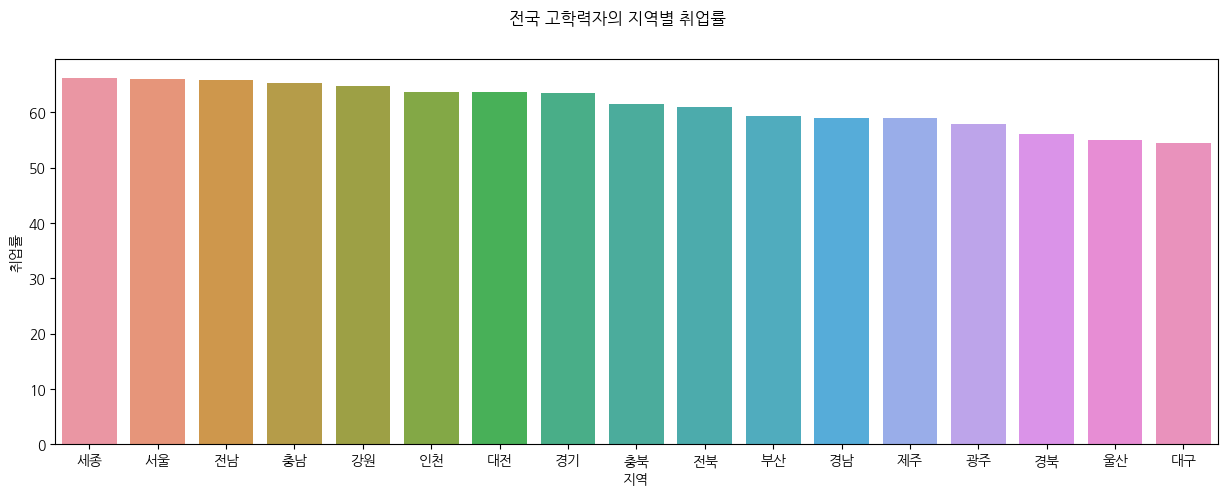

In [ ]:
# 지역별 취업률 시각화
fig, axes = plt. subplots(figsize = (15,5))
plt.suptitle('전국 고학력자의 지역별 취업률')

sns.barplot(data = college_df_local_employee, x = '지역', y = '취업률')
plt.show()


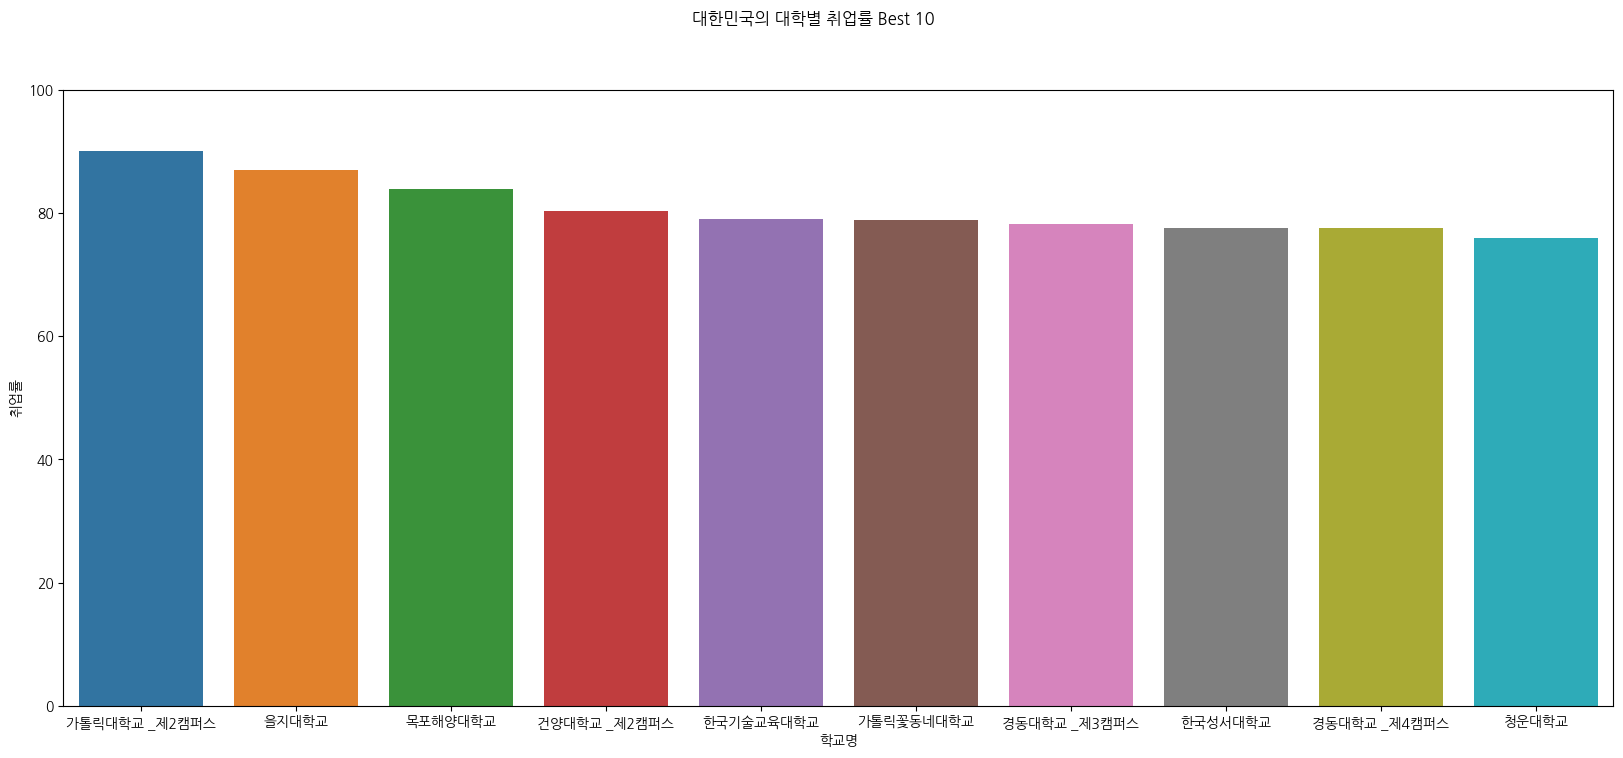

In [ ]:
# 취업률 Best 10 대학
fig, axes = plt. subplots(figsize = (20,8))
plt.suptitle('대한민국의 대학별 취업률 Best 10')

sns.barplot(data = college_df.head(10), x = '학교명', y = '취업률')
plt.ylim(0, 100)
plt.show()

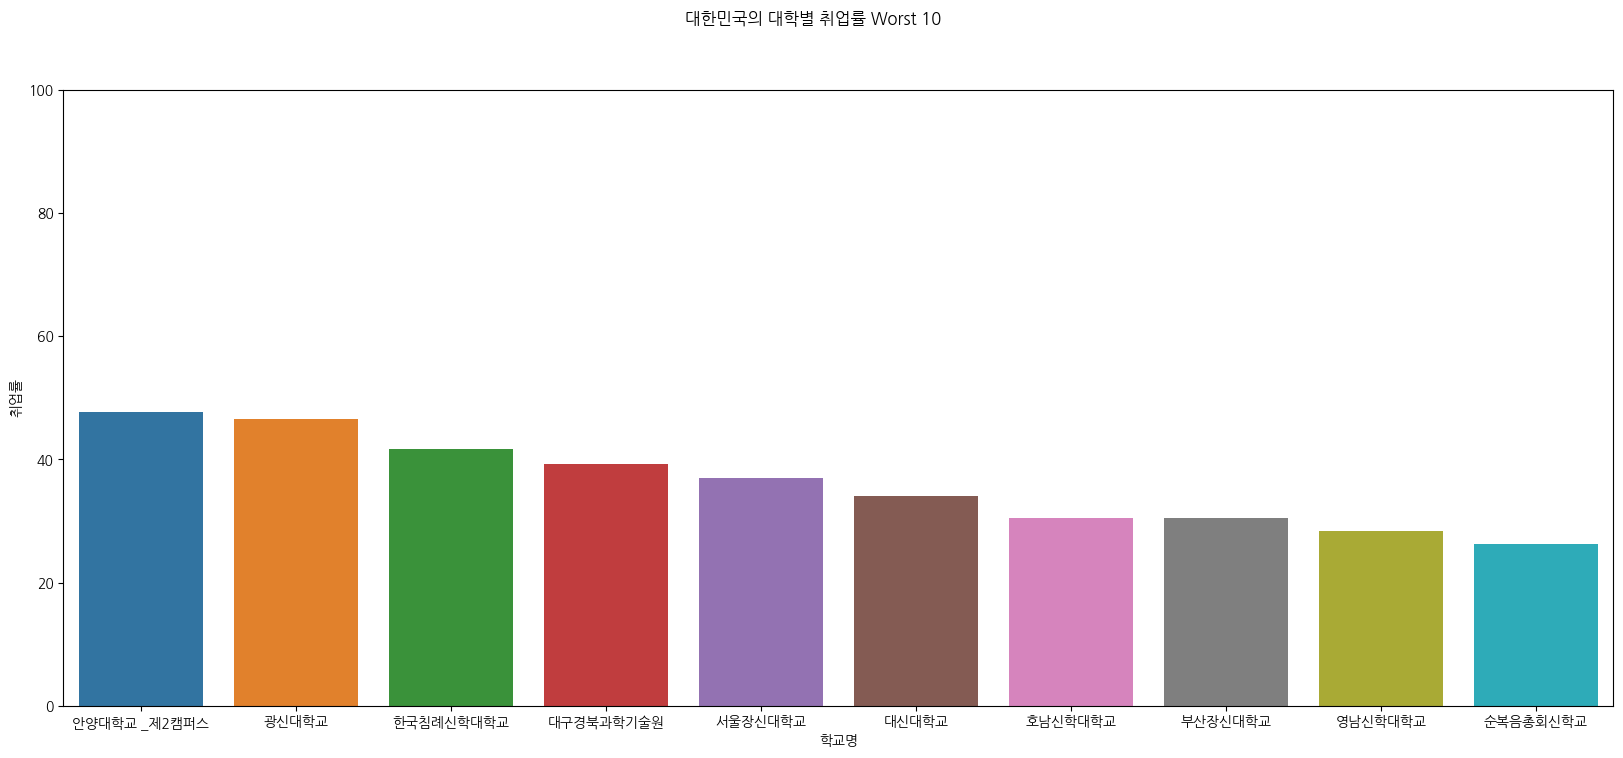

In [ ]:
# 취업률 Worst 10 대학 -> 취업률이 0은 제외함
fig, axes = plt. subplots(figsize = (20,8))
plt.suptitle('대한민국의 대학별 취업률 Worst 10')

sns.barplot(data = college_df.tail(10), x = '학교명', y = '취업률')
plt.ylim(0, 100)
plt.show()

In [ ]:
# 대학 지역별로 나누기
college_df_local_seoul = college_df[college_df['지역'].str.contains('서울')]
college_df_local_seoul

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
7,한국성서대학교,256.0,77.609091,서울
12,성균관대학교,4261.0,73.213333,서울
16,서강대학교,1818.0,72.146429,서울
19,서경대학교,1288.0,71.448649,서울
20,동덕여자대학교,1577.0,71.352381,서울
26,서울과학기술대학교,2361.0,70.347619,서울
28,한성대학교,1447.0,70.105000,서울
32,서울시립대학교,1862.0,69.418421,서울
38,한양대학교,3724.0,68.564615,서울


In [ ]:
college_df_local_gyeonggi = college_df[college_df['지역'].str.contains('경기')]
college_df_local_gyeonggi

,학교명,총졸업자,취업률,지역
8,경동대학교 _제4캠퍼스,300.0,77.533333,경기
11,한국공학대학교,1557.0,74.238710,경기
13,신한대학교,317.0,72.583333,경기
14,을지대학교 _제2캠퍼스,1030.0,72.517143,경기
21,중앙대학교 _제2캠퍼스,1674.0,71.100000,경기
24,아주대학교,2190.0,70.729730,경기
27,한국항공대학교,855.0,70.111111,경기
33,신한대학교 _제2캠퍼스,1098.0,69.381818,경기
36,한경국립대학교,1207.0,68.971875,경기
44,한양대학교(ERICA) _분교,2147.0,68.057692,경기


In [ ]:
college_df_local_incheon = college_df[college_df['지역'].str.contains('인천')]
college_df_local_incheon

,학교명,총졸업자,취업률,지역
25,인천가톨릭대학교 _제2캠퍼스,138.0,70.600000,인천
31,인하대학교,3962.0,69.828378,인천
67,인천대학교,2967.0,66.677083,인천
204,안양대학교 _제2캠퍼스,55.0,47.755556,인천


In [ ]:
frames = [college_df_local_seoul, college_df_local_gyeonggi]
college_df_sudo = pd.concat(frames)
college_df_sudo

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
7,한국성서대학교,256.0,77.609091,서울
12,성균관대학교,4261.0,73.213333,서울
16,서강대학교,1818.0,72.146429,서울
19,서경대학교,1288.0,71.448649,서울
...,...,...,...,...
189,칼빈대학교,97.0,54.483333,경기
193,루터대학교,87.0,53.425000,경기
196,서울신학대학교,452.0,52.745455,경기
201,예원예술대학교 _제2캠퍼스,62.0,49.675000,경기


In [ ]:
frames = [college_df_sudo, college_df_local_incheon]
college_df_sudo = pd.concat(frames).sort_values('취업률',ascending=False)
college_df_sudo

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
7,한국성서대학교,256.0,77.609091,서울
8,경동대학교 _제4캠퍼스,300.0,77.533333,경기
11,한국공학대학교,1557.0,74.238710,경기
12,성균관대학교,4261.0,73.213333,서울
...,...,...,...,...
193,루터대학교,87.0,53.425000,경기
196,서울신학대학교,452.0,52.745455,경기
201,예원예술대학교 _제2캠퍼스,62.0,49.675000,경기
204,안양대학교 _제2캠퍼스,55.0,47.755556,인천


In [ ]:
# 수도권 데이터 확인
college_df_sudo

,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
7,한국성서대학교,256.0,77.609091,서울
8,경동대학교 _제4캠퍼스,300.0,77.533333,경기
11,한국공학대학교,1557.0,74.238710,경기
12,성균관대학교,4261.0,73.213333,서울
...,...,...,...,...
193,루터대학교,87.0,53.425000,경기
196,서울신학대학교,452.0,52.745455,경기
201,예원예술대학교 _제2캠퍼스,62.0,49.675000,경기
204,안양대학교 _제2캠퍼스,55.0,47.755556,인천


In [ ]:
# 충청권 데이터
college_df_local_daejeon = college_df[college_df['지역'].str.contains('대전')]
college_df_local_sejong = college_df[college_df['지역'].str.contains('세종')]
college_df_local_chungcheongnam = college_df[college_df['지역'].str.contains('충남')]
college_df_local_chungcheongbuk = college_df[college_df['지역'].str.contains('충북')]

In [ ]:
college_df_local_chungcheong = pd.concat([college_df_local_daejeon, college_df_local_sejong,
                                          college_df_local_chungcheongnam, college_df_local_chungcheongbuk]).sort_values('취업률',ascending=False)
college_df_local_chungcheong

,학교명,총졸업자,취업률,지역
1,을지대학교,163.0,86.933333,대전
3,건양대학교 _제2캠퍼스,868.0,80.377273,대전
4,한국기술교육대학교,863.0,79.100000,충남
5,가톨릭꽃동네대학교,117.0,78.800000,충북
9,청운대학교,1431.0,75.960784,충남
15,건양대학교,947.0,72.448148,충남
29,극동대학교,786.0,70.054286,충북
35,순천향대학교,2532.0,69.267143,충남
42,남서울대학교,2272.0,68.153659,충남
47,우송대학교,2154.0,67.817949,대전


In [ ]:
# 경상권 데이터
college_df_local_busan = college_df[college_df['지역'].str.contains('부산')]
college_df_local_deagu = college_df[college_df['지역'].str.contains('대구')]
college_df_local_ulsan = college_df[college_df['지역'].str.contains('울산')]
college_df_local_gyeongsangnam = college_df[college_df['지역'].str.contains('경남')]
college_df_local_gyeongsangbuk = college_df[college_df['지역'].str.contains('경북')]

In [ ]:
college_df_local_gyeongsang = pd.concat([college_df_local_busan, college_df_local_deagu, college_df_local_ulsan,
                                          college_df_local_gyeongsangnam, college_df_local_gyeongsangbuk]).sort_values('취업률',ascending=False)
college_df_local_gyeongsang

,학교명,총졸업자,취업률,지역
18,가야대학교(김해),546.0,71.866667,경남
30,포항공과대학교,316.0,70.036364,경북
41,부산교육대학교,387.0,68.230769,부산
43,한국해양대학교,1402.0,68.063415,부산
45,대구교육대학교,417.0,67.930769,대구
54,진주교육대학교,328.0,67.291667,경남
69,인제대학교,2150.0,66.520513,경남
87,동서대학교,2271.0,65.144286,부산
92,동국대학교(WISE) _분교,1684.0,64.576786,경북
109,경주대학교,240.0,63.337037,경북


In [ ]:
# 전라권 데이터
college_df_local_gwangju = college_df[college_df['지역'].str.contains('광주')]
college_df_local_jeollanam = college_df[college_df['지역'].str.contains('전남')]
college_df_local_jeollabuk = college_df[college_df['지역'].str.contains('전북')]

In [ ]:
college_df_local_jeolla = pd.concat([college_df_local_gwangju, college_df_local_jeollanam, college_df_local_jeollabuk]).sort_values('취업률',ascending=False)
college_df_local_jeolla

,학교명,총졸업자,취업률,지역
2,목포해양대학교,502.0,83.946154,전남
10,한려대학교,110.0,74.737500,전남
17,남부대학교,695.0,71.995455,광주
23,예수대학교,150.0,70.850000,전북
34,광주교육대학교,335.0,69.315385,광주
37,호원대학교,1273.0,68.756522,전북
39,초당대학교,677.0,68.537500,전남
64,목포가톨릭대학교,119.0,66.833333,전남
70,예원예술대학교,110.0,66.508333,전북
78,우석대학교,1473.0,66.045588,전북


In [ ]:
# 기타(제주 + 강원) 데이터
college_df_local_jeju = college_df[college_df['지역'].str.contains('제주')]
college_df_local_gangwon = college_df[college_df['지역'].str.contains('강원')]
college_df_local_jeju

,학교명,총졸업자,취업률,지역
110,제주국제대학교,251.0,63.324242,제주
188,제주대학교,2064.0,54.554118,제주


In [ ]:
college_df_local_gita = pd.concat([college_df_local_jeju, college_df_local_gangwon]).sort_values('취업률',ascending=False)
college_df_local_gita

,학교명,총졸업자,취업률,지역
6,경동대학교 _제3캠퍼스,957.0,78.220000,강원
22,강원대학교 _제2캠퍼스,1504.0,70.909524,강원
49,한라대학교,804.0,67.604348,강원
66,강원대학교,3426.0,66.756962,강원
68,경동대학교,522.0,66.638095,강원
80,연세대학교(미래) _분교,1654.0,65.797619,강원
102,상지대학교,1312.0,63.890385,강원
110,제주국제대학교,251.0,63.324242,제주
125,강릉원주대학교 _제2캠퍼스,520.0,62.214286,강원
133,춘천교육대학교,340.0,60.591667,강원


In [ ]:
# 지역별 데이터
#college_df_sudo
#college_df_local_chungcheong
#college_df_local_gyeongsang
#college_df_local_jeolla
#college_df_local_gita

college_df
# gj_df = gwju_df.set_index('행정구역').T


,학교명,총졸업자,취업률,지역
0,가톨릭대학교 _제2캠퍼스,174.0,90.100000,서울
1,을지대학교,163.0,86.933333,대전
2,목포해양대학교,502.0,83.946154,전남
3,건양대학교 _제2캠퍼스,868.0,80.377273,대전
4,한국기술교육대학교,863.0,79.100000,충남
...,...,...,...,...
209,대신대학교,101.0,34.120000,경북
210,호남신학대학교,123.0,30.550000,광주
211,부산장신대학교,56.0,30.466667,경남
212,영남신학대학교,95.0,28.400000,경북


In [ ]:
college_df_local_gita = college_df_local_gita.loc[:, ['학교명','취업률']]
college_df_local_gita

,학교명,취업률
6,경동대학교 _제3캠퍼스,78.220000
22,강원대학교 _제2캠퍼스,70.909524
49,한라대학교,67.604348
66,강원대학교,66.756962
68,경동대학교,66.638095
80,연세대학교(미래) _분교,65.797619
102,상지대학교,63.890385
110,제주국제대학교,63.324242
125,강릉원주대학교 _제2캠퍼스,62.214286
133,춘천교육대학교,60.591667


In [ ]:
college_df_local_gita = college_df_local_gita.head(5).set_index('학교명').T

In [ ]:
college_df_local_gita

학교명,경동대학교 _제3캠퍼스,강원대학교 _제2캠퍼스,한라대학교,강원대학교,경동대학교
취업률,78.22,70.909524,67.604348,66.756962,66.638095


In [ ]:
college_df_local_sudo1 = college_df_sudo.loc[:, ['학교명','취업률']]
college_df_local_chungcheong1 = college_df_local_chungcheong.loc[:, ['학교명','취업률']]
college_df_local_gyeongsang1 = college_df_local_gyeongsang.loc[:, ['학교명','취업률']]
college_df_local_jeolla1 = college_df_local_jeolla.loc[:, ['학교명','취업률']]

In [ ]:
college_df_local_sudo1 = college_df_local_sudo1.head(5).set_index('학교명').T
college_df_local_sudo1

학교명,가톨릭대학교 _제2캠퍼스,한국성서대학교,경동대학교 _제4캠퍼스,한국공학대학교,성균관대학교
취업률,90.1,77.609091,77.533333,74.23871,73.213333


In [ ]:
college_df_local_gyeongsang1 = college_df_local_gyeongsang1.head(5).set_index('학교명').T
college_df_local_gyeongsang1

학교명,가야대학교(김해),포항공과대학교,부산교육대학교,한국해양대학교,대구교육대학교
취업률,71.866667,70.036364,68.230769,68.063415,67.930769


In [ ]:
college_df_local_jeolla1 = college_df_local_jeolla1.head(5).set_index('학교명').T
college_df_local_jeolla1

학교명,목포해양대학교,한려대학교,남부대학교,예수대학교,광주교육대학교
취업률,83.946154,74.7375,71.995455,70.85,69.315385


In [ ]:
college_df_local_chungcheong1 = college_df_local_chungcheong1.head(5).set_index('학교명').T
college_df_local_chungcheong1

학교명,을지대학교,건양대학교 _제2캠퍼스,한국기술교육대학교,가톨릭꽃동네대학교,청운대학교
취업률,86.933333,80.377273,79.1,78.8,75.960784


In [ ]:
# 그래프 시각화
fig = px.bar(college_df_local_sudo1, x = '학교명', y = college_df_local_sudo1.columns,
             text_auto = True, # 각 레이블당 값이 출력
             title = '수도권 대학의 취업률 Best 5')

fig.show()

In [ ]:
fig = px.bar(college_df_local_chungcheong1, x = '학교명', y = college_df_local_chungcheong1.columns,
             text_auto = True, # 각 레이블당 값이 출력
             title = '충청권 대학의 취업률 Best 5')

fig.show()

In [ ]:
fig = px.bar(college_df_local_gyeongsang1, x = '학교명', y = college_df_local_gyeongsang1.columns,
             text_auto = True, # 각 레이블당 값이 출력
             title = '경상권 대학의 취업률 Best 5')

fig.show()

In [ ]:
fig = px.bar(college_df_local_jeolla1, x = '학교명', y = college_df_local_jeolla1.columns,
             text_auto = True, # 각 레이블당 값이 출력
             title = '전라권 대학의 취업률 Best 5')

fig.show()

In [ ]:
fig = px.bar(college_df_local_gita, x = '학교명', y = college_df_local_gita.columns,
             text_auto = True, # 각 레이블당 값이 출력
             title = '기타(강원+제주) 대학의 취업률 Best 5')

fig.show()

In [ ]:
# 지역별 그래프 비교
local_top5_df = pd.read_csv('/content/drive/MyDrive/KDT /a전국대학별TOP5.csv')
local_top5_df

,지역,TOP1,TOP2,TOP3,TOP4,TOP5
0,수도권,90.1,77.6,77.5,74.2,73.2
1,충청권,86.9,80.4,78.8,76.0,70.1
2,경상권,71.9,70.0,68.2,68.0,68.0
3,전라권,83.9,74.7,72.0,70.8,69.3
4,기타(강원 + 제주),78.2,70.9,67.6,66.7,66.6


In [ ]:
fig = px.bar(local_top5_df, x = '지역', y = local_top5_df.columns,
             barmode = 'group', #연도별로 보기위한 방법
             text_auto = True, # 각 레이블당 값이 출력
             title = '지역별 대학교 TOP5')

fig.show()

In [ ]:
# sudo_chung_df =

# # 수도권
# fig = px.bar(college_df_local_sudo1, x = '학교명', y = college_df_local_sudo1.columns,
#              text_auto = True, # 각 레이블당 값이 출력
#              title = '수도권 대학의 취업률 Best 5')
# # 충청권
# fig = px.bar(college_df_local_chungcheong1, x = '학교명', y = college_df_local_chungcheong1.columns,
#              text_auto = True, # 각 레이블당 값이 출력
#              title = '충청권 대학의 취업률 Best 5')